In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import synthpop
from area import examine_catalog

In [35]:
%load_ext autoreload
%autoreload 2

In [7]:
coord_acs = SkyCoord(ra='17:53:32.48', dec='-29:35:02.8', unit=(u.hourangle, u.degree)).transform_to('galactic')
coord_wfc3 = SkyCoord('17:53:14.91', '-29:30:34.2', unit=(u.hourangle, u.degree)).transform_to('galactic')
fov_acs, fov_wfc3 = 0.061**2, 0.047*0.058
print(coord_acs)
print(coord_wfc3)
print(fov_acs, fov_wfc3)

<SkyCoord (Galactic): (l, b) in deg
    (0.33197779, -1.81503783)>
<SkyCoord (Galactic): (l, b) in deg
    (0.36402556, -1.7223185)>
0.003721 0.002726


0.33230855996193176 -1.8151686249054328
[ 0.03244368  0.00982521 -0.03297962 -0.01105304  0.03244368]
[-0.00892564  0.02909538  0.0096734  -0.03009643 -0.00892564]
0.002130419239796054 deg^2
7.669509263265794 arcmin^2


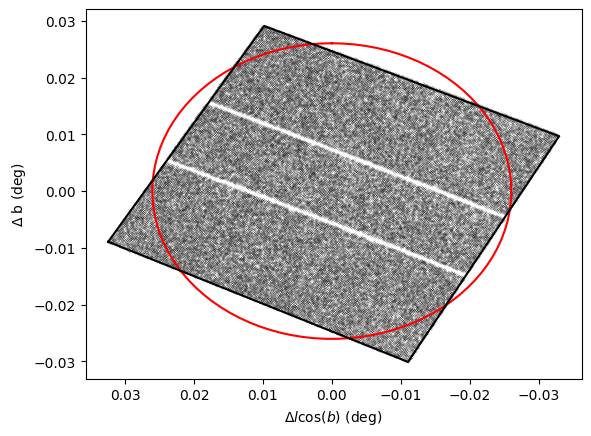

In [52]:
fov_acs = examine_catalog('data/HD37/cats/field_HD37_ACS/hst_17776_14_acs_wfc_total.cat', use_lb=True)

268.30842530055565 -29.508040418385495
[ 0.02738857  0.00616643 -0.02734365 -0.00611703  0.02738857]
[ 0.00128901  0.02518358 -0.00143219 -0.02473334  0.00128901]
0.0013493188503281807 deg^2
4.85754786118145 arcmin^2


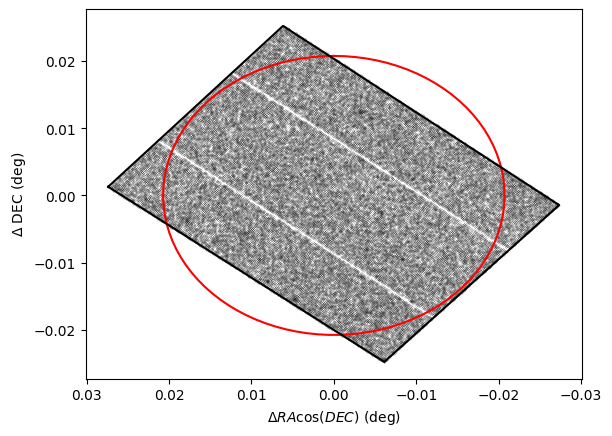

In [53]:
fov_wfc3 =  examine_catalog('data/HD37/cats/field_HD37_WFC3/hst_17776_14_wfc3_uvis_total.cat')

In [10]:
model=0
model = synthpop.SynthPop(default_config='macy_defaults.synthpop_conf',
                            model_name="Huston2025", name_for_output='Huston2025',
                            maglim=['ACS_WFC_F814W', 26,"remove"], 
                            chosen_bands=['ACS_WFC_F814W', 'ACS_WFC_F606W', 'WFC3_UVIS_F814W', 'WFC3_UVIS_F606W'],
                            output_location="outputfiles/hst_pre",
                            extinction_map_kwargs={"name":"surot","project_3d":True,"dist_2d":8.15},
                            post_processing_kwargs=[{"name": "ProcessDarkCompactObjects","remove": True},
                                {"name": "ConvertMistMags", 
                                 "conversions": {"AB": ['ACS_WFC_F814W', 'ACS_WFC_F606W', 'WFC3_UVIS_F814W', 'WFC3_UVIS_F606W']}}]
                         )
model.init_populations()

 719288 - Execution Date: 23-04-2025 15:23:08


################################ Settings #################################
 719289 - # reading default parameters from
 719290 - default_config_file =  /Users/mhuston/Documents/synthpop/synthpop/config_files/macy_defaults.synthpop_conf 


# copy the following to a config file to redo this model generation -------
 719292 - {
    "l_set": null,
    "l_set_type": null,
    "b_set": null,
    "b_set_type": null,
    "random_seed": 1374809310,
    "name_for_output": "Huston2025",
    "model_name": "Huston2025",
    "solid_angle": null,
    "solid_angle_unit": "deg^2",
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
        "w_lsr": 0.53
    },
    "warp": {
        "r_warp": 7.72,
        "amp_warp": 0.06,
        "amp_warp_pos": null,
    

In [54]:
sim_acs, _ = model.process_location(l_deg=coord_acs.l.degree, b_deg=coord_acs.b.degree, 
                                    solid_angle=fov_acs, solid_angle_unit='deg^2')
sim_wfc3, _ = model.process_location(l_deg=coord_wfc3.l.degree, b_deg=coord_wfc3.b.degree, 
                                     solid_angle=fov_wfc3, solid_angle_unit='deg^2')
sim_acs  = pd.read_csv("outputfiles/hst_pre/Huston2025_l0.332_b-1.815.csv")
sim_wfc3 = pd.read_csv("outputfiles/hst_pre/Huston2025_l0.364_b-1.722.csv")



############################# update location #############################
 2707386 - # set location to: 
 2707387 - l, b = (0.33 deg, -1.82 deg)
 2707387 - # set solid_angle to:
 2707388 - solid_angle = 2.130e-03 deg^2


############################# Generate Field ##############################


# Population 0;  bulge ----------------------------------------------------
 2709177 - # From density profile (number density)
 2709177 - expected_total_iMass = 708297.9603
 2709177 - expected_total_eMass = 384841.9448
 2709178 - average_iMass_per_star = 0.5739
 2709178 - mass_loss_correction = 0.5433
 2709178 - n_expected_stars = 1234256.8093
 2709179 - # Determine velocities when position are generated 


  0%|          | 0/1233881 [00:00<?, ?it/s]

 2727261 - # From Generated Field:
 2727262 - generated_stars = 447719
 2727266 - generated_total_iMass = 221973.4122
 2727297 - generated_total_eMass = 221913.3896
 2727305 - det_mass_loss_corr = 0.9997
 2727671 - # Done


# Population 1;  halo -----------------------------------------------------
 2728028 - # From density profile (number density)
 2728028 - expected_total_iMass = 1081.4476
 2728028 - expected_total_eMass = 570.8149
 2728029 - average_iMass_per_star = 0.5739
 2728029 - mass_loss_correction = 0.5278
 2728029 - n_expected_stars = 1884.4952
 2728030 - # Determine velocities when position are generated 
 2728117 - # From Generated Field:
 2728118 - generated_stars = 919
 2728118 - generated_total_iMass = 327.3176
 2728122 - generated_total_eMass = 327.2472
 2728122 - det_mass_loss_corr = 0.9998
 2728126 - # Done


# Population 2;  nsd ------------------------------------------------------
 2729034 - # From density profile (number density)
 2729034 - expected_total_iMass =

  0%|          | 0/814672 [00:00<?, ?it/s]

 2761558 - # From Generated Field:
 2761559 - generated_stars = 269837
 2761562 - generated_total_iMass = 139711.8727
 2761580 - generated_total_eMass = 139667.8271
 2761584 - det_mass_loss_corr = 0.9997
 2761787 - # Done


# Population 1;  halo -----------------------------------------------------
 2762131 - # From density profile (number density)
 2762131 - expected_total_iMass = 693.4486
 2762132 - expected_total_eMass = 366.0194
 2762132 - average_iMass_per_star = 0.5739
 2762132 - mass_loss_correction = 0.5278
 2762132 - n_expected_stars = 1208.3809
 2762133 - # Determine velocities when position are generated 
 2762205 - # From Generated Field:
 2762205 - generated_stars = 526
 2762206 - generated_total_iMass = 200.0592
 2762209 - generated_total_eMass = 199.9974
 2762210 - det_mass_loss_corr = 0.9997
 2762213 - # Done


# Population 2;  nsd ------------------------------------------------------
 2763122 - # From density profile (number density)
 2763123 - expected_total_iMass = 

In [55]:
cat1_all = pd.read_csv('data/HD37/cats/field_HD37_ACS/hst_17776_14_acs_wfc_total.cat',comment='#', sep='\s+')
cat2_all = pd.read_csv('data/HD37/cats/field_HD37_WFC3/hst_17776_14_wfc3_uvis_total.cat',comment='#', sep='\s+')

In [56]:
cat1_all

,ID,X-Centroid,Y-Centroid,RA,DEC,MagAP2_f814w,CI_f814w,Flags_f814w,MagAP2_f606w,CI_f606w,Flags_f606w
0,17670,1157.933144,738.641193,268.409067,-29.608663,21.789343,1.985458,1,22.550478,1.427039,1
1,17707,1222.074052,736.728539,268.408043,-29.608690,22.452947,1.590551,65,23.359114,1.280864,1
2,17708,1235.507229,736.382343,268.407828,-29.608695,22.970209,1.041578,64,24.827914,1.326026,1
3,17741,1211.186418,737.573768,268.408217,-29.608678,22.871042,1.850040,65,24.299905,1.110786,0
4,17806,1186.952039,739.253237,268.408604,-29.608655,23.657154,1.698026,1,24.846255,1.198084,0
...,...,...,...,...,...,...,...,...,...,...,...
74534,158014,1862.017929,4114.936404,268.397814,-29.561772,17.953223,2.916393,5,17.599955,1.743047,5
74535,158015,1326.967885,4159.008461,268.406357,-29.561158,22.814163,1.981639,1,25.026779,1.998622,1
74536,158016,1323.554616,4168.807884,268.406411,-29.561022,22.695202,2.039920,1,23.823026,1.995754,1
74537,158017,1322.343723,4189.713641,268.406431,-29.560732,22.181299,2.119790,1,22.547996,2.031534,1


In [57]:
len(np.where((cat1_all.Flags_f606w==0))[0]), len(np.where((cat1_all.Flags_f606w==1))[0]), \
    len(np.where((cat1_all.Flags_f606w==2))[0]), len(np.where((cat1_all.Flags_f606w==4))[0]), \
    len(np.where((cat1_all.Flags_f606w==8))[0])

(50776, 20444, 0, 766, 475)

In [58]:
cat1 = cat1_all #[(cat1_all['Flags_f814w']==0) & (cat1_all['Flags_f606w']==0)].reset_index(drop=True)
cat2 = cat2_all #[(cat2_all['Flags_f814w']==0) & (cat2_all['Flags_f606w']==0)].reset_index(drop=True)
print("N stars:",len(cat1),len(cat2))

N stars: 74539 59873


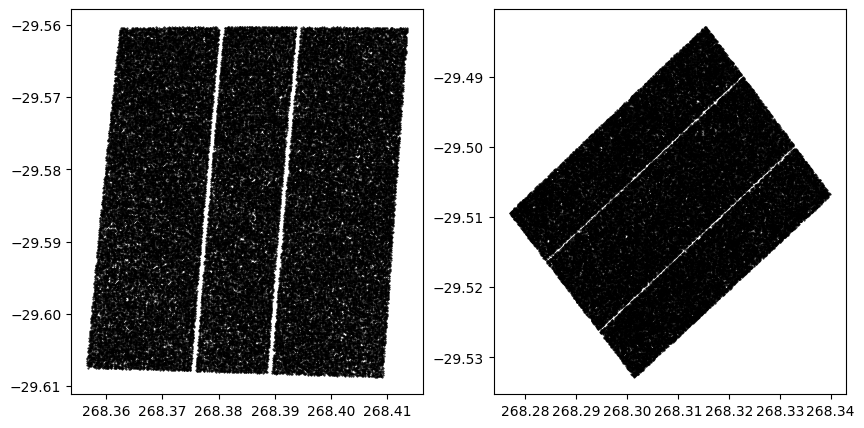

In [59]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
#ax[0].plot(cat1_all.RA, cat1_all.DEC, 'r.', markersize=1)
ax[0].plot(cat1.RA, cat1.DEC, 'k.', markersize=1)
#ax[1].plot(cat2_all.RA, cat2_all.DEC, 'r.', markersize=1)
ax[1].plot(cat2.RA, cat2.DEC, 'k.', markersize=1)

Nstars F814W<23 56653 97656


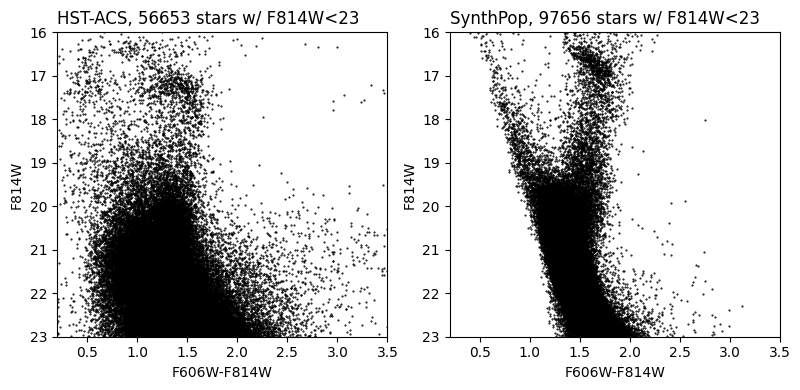

In [60]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(cat1.MagAP2_f606w-cat1.MagAP2_f814w, cat1.MagAP2_f814w, 'k.',markersize=1)
ax[1].plot(sim_acs.ACS_WFC_F606W-sim_acs.ACS_WFC_F814W, sim_acs.ACS_WFC_F814W, 'k.',markersize=1)
for axi in ax:
    axi.set_ylim(23,16); axi.set_xlim(0.2,3.5)
    axi.set_ylabel('F814W'); axi.set_xlabel('F606W-F814W')
ax[0].set_title('HST-ACS, '+str(sum(cat1.MagAP2_f814w<23))+' stars w/ F814W<23', loc='left')
ax[1].set_title('SynthPop, '+str(sum(sim_acs.ACS_WFC_F814W<23))+' stars w/ F814W<23',loc='left')
print('Nstars F814W<23', sum(cat1.MagAP2_f814w<23), sum(sim_acs.ACS_WFC_F814W<23))
plt.tight_layout()
plt.savefig('figures/cmd_hd37_acs.png')

Nstars F814W<23 40224 56208


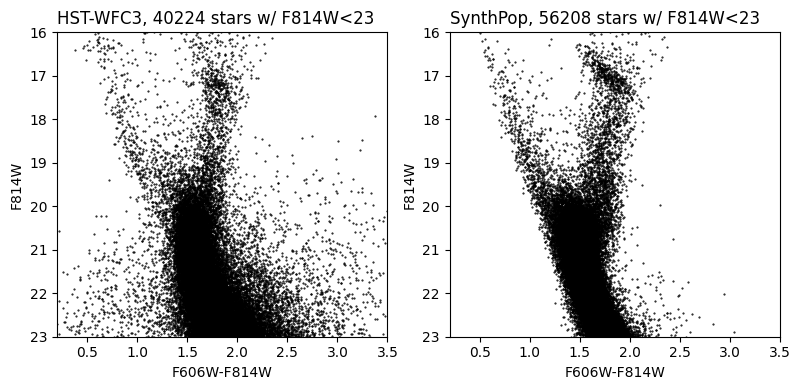

In [61]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(cat2.MagAP2_f606w-cat2.MagAP2_f814w, cat2.MagAP2_f814w, 'k.',markersize=1)
ax[1].plot(sim_wfc3.WFC3_UVIS_F606W-sim_wfc3.WFC3_UVIS_F814W, sim_wfc3.WFC3_UVIS_F814W, 'k.',markersize=1)
for axi in ax:
    axi.set_ylim(23,16); axi.set_xlim(0.2,3.5)
    axi.set_ylabel('F814W'); axi.set_xlabel('F606W-F814W')
ax[0].set_title('HST-WFC3, '+str(sum(cat2.MagAP2_f814w<23))+' stars w/ F814W<23', loc='left')
ax[1].set_title('SynthPop, '+str(sum(sim_wfc3.WFC3_UVIS_F814W<23))+' stars w/ F814W<23',loc='left')
print('Nstars F814W<23', sum(cat2.MagAP2_f814w<23), sum(sim_wfc3.WFC3_UVIS_F814W<23))
plt.tight_layout()
plt.savefig('figures/cmd_hd37_wfc3.png')

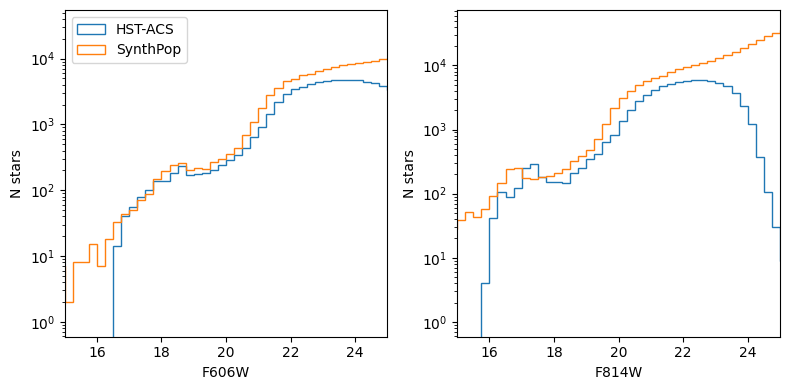

In [93]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
bins = np.arange(10,30.1,0.25)
obs_606 = ax[0].hist(cat1.MagAP2_f606w,histtype='step',bins=bins, label='HST-ACS')
sim_606 = ax[0].hist(sim_acs.ACS_WFC_F606W,histtype='step',bins=bins, label='SynthPop')
obs_814 = ax[1].hist(cat1.MagAP2_f814w,histtype='step',bins=bins)
sim_814 = ax[1].hist(sim_acs.ACS_WFC_F814W,histtype='step',bins=bins)
#ax[2].step(0.5*(bins[:-1]+bins[1:]), sim_606[0]/obs_606[0], where='mid', label='F606W', c='green')
#ax[2].step(0.5*(bins[:-1]+bins[1:]), sim_814[0]/obs_814[0], where='mid', label='F814W', c='pink')
for axi in ax:
    axi.set_yscale('log')
    axi.set_xlim(15,25)
#ax[2].set_yscale('linear')
#ax[2].set_ylim(0,4)
#ax[2].axhline(1,color='gray', linestyle='--')
ax[0].set_xlabel('F606W'); ax[1].set_xlabel('F814W')
ax[0].set_ylabel('N stars'); ax[1].set_ylabel('N stars')
ax[0].legend() #; ax[2].legend()
#ax[0].set_title('Luminosity Functions',loc='left')
#ax[2].set_title('SP/HST Ratio',loc='left')
#ax[2].set_ylabel('SP/HST N stars ratio'); ax[2].set_xlabel('mag.')
plt.tight_layout()
plt.savefig('figures/lf_hd37_acs.png')

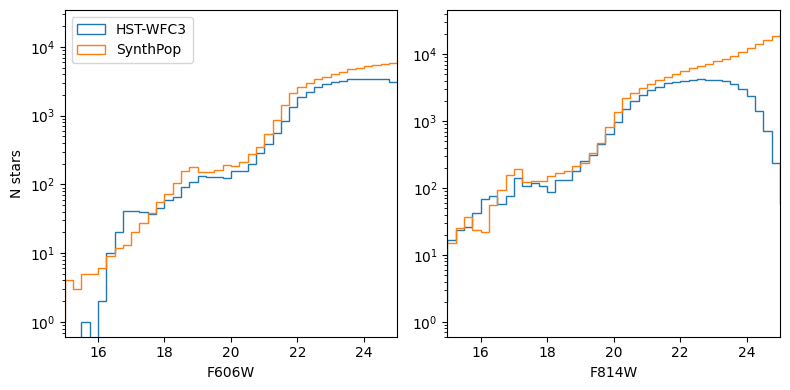

In [63]:
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
bins = np.arange(10,30.1,0.25)
ax[0].hist(cat2.MagAP2_f606w,histtype='step',bins=bins, label='HST-WFC3')
ax[0].hist(sim_wfc3.WFC3_UVIS_F606W,histtype='step',bins=bins, label='SynthPop')
ax[1].hist(cat2.MagAP2_f814w,histtype='step',bins=bins)
ax[1].hist(sim_wfc3.WFC3_UVIS_F814W,histtype='step',bins=bins)
for axi in ax:
    axi.set_yscale('log')
    axi.set_xlim(15,25)
ax[0].set_xlabel('F606W'); ax[1].set_xlabel('F814W')
ax[0].set_ylabel('N stars')
ax[0].legend()
plt.tight_layout()
plt.savefig('figures/lf_hd37_wfc3.png')